<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/IP_ThresholdingMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Tvisha Shah
RollNo: C092
Batch: C1
SAPID:70321019093
Date: 11/08/2023

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plot
import random
import numpy as np

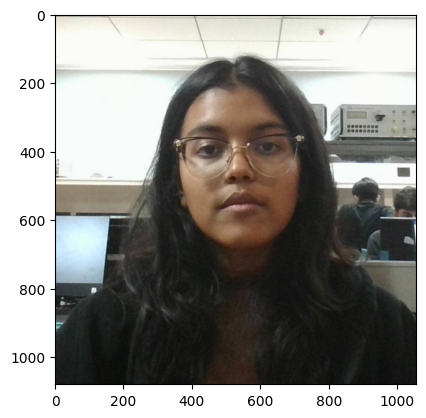

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Capture0.png')
image1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plot.imshow(image1)
plot.show()

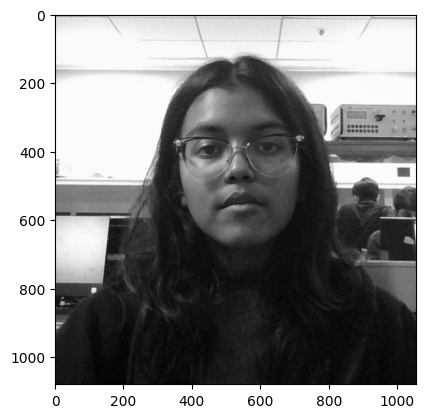

In [ ]:
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plot.imshow(gray_image, cmap='gray')
plot.show()

 Negation of an image


In [ ]:
maximum = gray_image.max()
maximum

255

In [ ]:
new_image = (maximum- gray_image)

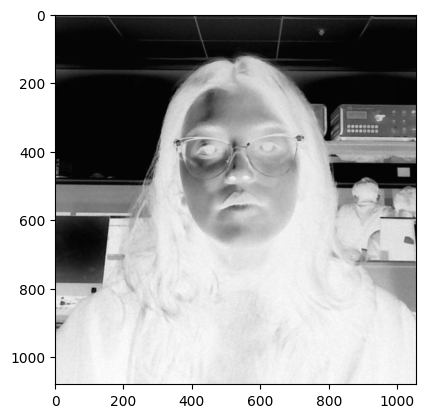

In [ ]:
plot.imshow(new_image, cmap='gray')
plot.show()

Thresholding of an Image


In [ ]:
threshold_val = gray_image.mean()
threshold_val

113.8591987584175

In [ ]:
threshold_image = []
temp = []
for i in gray_image:
  for pixel in i:
    if pixel < threshold_val:
      temp.append(0)
    elif pixel >= threshold_val:
      temp.append(255)
    else:
      temp.append(pixel)

  threshold_image.append(temp)
  temp = []



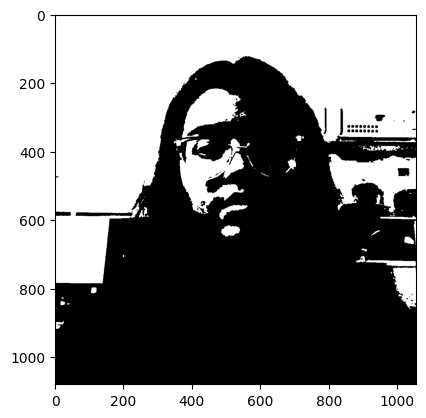

In [ ]:
plot.imshow(threshold_image, cmap='gray')
plot.show()

Contrast Stretching  of an Image

In [ ]:
r1,r2= 100,120
s1,s2= 50,60
L= 255

In [ ]:
alpha= s1/ r1
beta= (s1-s1)/(r2-r1)
gamma= ((L-1)- s2)/ ((L-1)- r2)

if input pixel value is <= r1 then o/p = alpha x input
If input pixel is > r1and <=r2 then o/p = beta x (r-r1)+s1
otherwise o/p = gamma x (r-r2)+s2


In [ ]:
contrast_image = []
temp = []
for i in gray_image:
  for pixel in i:
    if pixel <= r1:
      val=alpha*pixel
      temp.append(val)
    elif pixel > r1 and pixel <= r2:
      val= beta*(pixel-r1)+s1
      temp.append(val)
    else:
      val= gamma*(pixel-r2)+s2
      temp.append(val)

  contrast_image.append(temp)
  temp = []


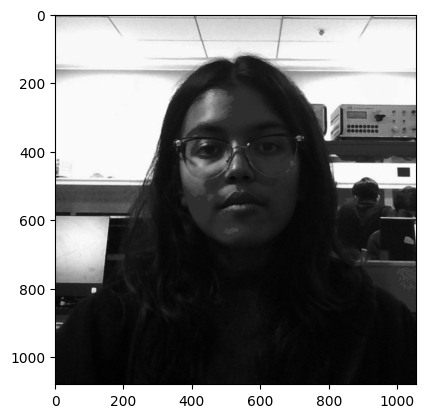

In [ ]:
plot.imshow(contrast_image, cmap='gray')
plot.show()

Gray Level Slicing ( Intensity Level Slicing)

In [ ]:
a,b= 20,120

In [ ]:
withbg_image = []
temp = []
for i in gray_image:
  for pixel in i:
    if a <= pixel and b >= pixel:
      s=L-1
      temp.append(s)
    else:
      val=0
      temp.append(val)

  withbg_image.append(temp)
  temp = []


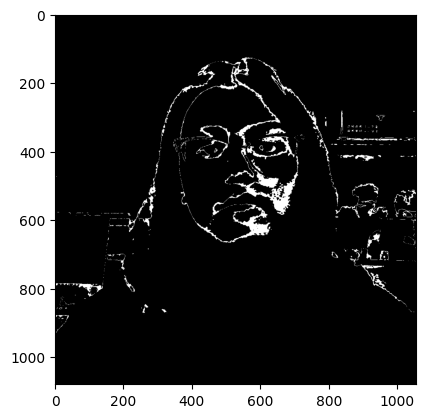

In [ ]:
plot.imshow(withbg_image, cmap='gray')
plot.show()

In [ ]:
withoutbg_image = []
temp = []
for i in gray_image:
  for pixel in i:
    if a <= pixel and b >= pixel:
      s=L-1
      temp.append(s)
    else:
      val=pixel
      temp.append(val)

  withoutbg_image.append(temp)
  temp = []


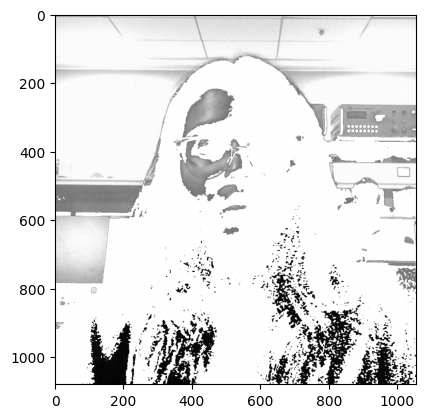

In [ ]:
plot.imshow(withoutbg_image, cmap='gray')
plot.show()

Bit Plane Slicing



In [ ]:
psnr=10*np.log10((255*255)/(1/(225*225)*np.sum(gray_image)*np.sum(gray_image)))
print('PSNR is: ',psnr)

PSNR is:  -67.09466196881019


In [ ]:
def cov_binary(num):
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)
    return binary_num
def conv_decimal(listt):
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x
def discriminate_bit(bit,img):
    z = np.zeros([225,225])
    for i in range(225):
        for j in range(225):
            x = cov_binary(img[i][j])
            for k in range(8):
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

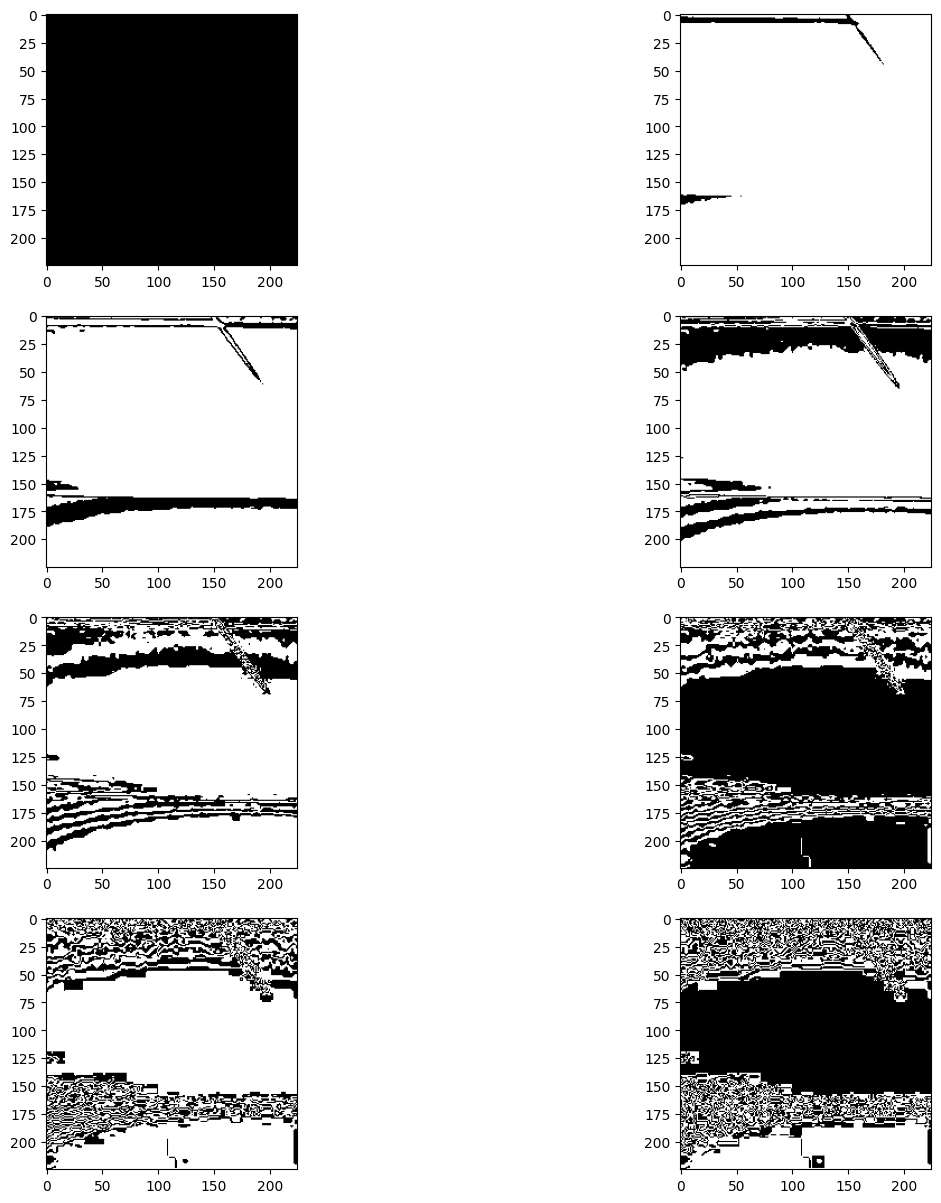

In [ ]:
fig = plot.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,9):
    fig.add_subplot(4,2,i)
    plot.imshow(discriminate_bit(i-1,gray_image), cmap='gray')


plot.show(block=True)